# Slice and Dice ICP data

Using Pandas to import these csv files and then organize by element name and wavelength


In [2]:
# This is a strategy for importing data into lists so that we can use it!
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
# read the whole data file in:
data = pd.read_csv("FA22_exp4.csv", header = 6)


#slice by element
Cu = data[data.values == 'Cu']
Pb = data[data.values == 'Pb']
Fe = data[data.values == 'Fe']

#slice out standards for each element
Cu_standards = Cu[Cu.values == 'STD'] #all standard data for Cu
Pb_standards = Pb[Pb.values == 'STD'] #all standard data for Pb
Fe_standards = Fe[Fe.values == 'STD'] #all standard data for Fe

standards_conc = [0.1,0.5,1.0,2.0,4.0,6.0,8.0,10.0,25.0,50.0] #values entered in ug/L, make sure this is the correct order for our data!



#pull out all average intensities
Cu_standard_x = Cu_standards['Intensity'].tolist()
Pb_standard_x = Pb_standards['Intensity'].tolist()
Fe_standard_x = Fe_standards['Intensity'].tolist()

#grab standard deviations from the data
Cu_standards_s = Cu_standards['Intensity SD'].tolist()
Pb_standard_x = Pb_standards['Intensity SD'].tolist()
Fe_standard_x = Fe_standards['Intensity SD'].tolist()

# grab all unknown replicates

Cu_unknowns = Cu[Cu.values == 'Sample'] # all the data
Cu_unknown_x = Cu_unknowns['Intensity'].tolist() # intensity data for each unknown
Cu_unknown_s = Cu_unknowns['Intensity SD'].tolist() # standard deviations for each unknown

Pb_unknowns = Pb[Pb.values == 'Sample'] # all the data
Pb_unknown_x = Pb_unknowns['Intensity'].tolist() # intensity data for each unknown
Pb_unknown_s = Pb_unknowns['Intensity SD'].tolist() # standard deviations for each unknown

Fe_unknowns = Fe[Fe.values == 'Sample'] # all the data
Fe_unknown_x = Fe_unknowns['Intensity'].tolist() # intensity data for each unknown
Fe_unknown_s = Fe_unknowns['Intensity SD'].tolist() # standard deviations for each unknown

#print(Cu)
#print(Pb)
#print(Fe)
#print(data)

## Part 1 - Graph the data and add error bars

For now, don't change anything about how this data is reading in, just make sure the code above has been run, and then let's plot the graph.
You've seen this code before, but take a closer look at what it's doing right now:
plt.plot is the command to plot an x-y scatter plot. plt.plot(x-value list, y-value list) is the simplest format we can use. The next information added here is 'bx' which gives us blue x marks for our data points. We can change that to change the look of our plot. Options can be found in the matplotlib documentation. 
All of the possible markers are listed here. For ease of use, stick to markers that are given inside apostrophes, which will work most easily in our simplified format https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
All of the named colors are listed here, again, prioritize the use of those listed in apostrophes: https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors

Change the color and marker shape to try this out, and be sure to fix the axis labels!


Text(0, 0.5, 'happiness (are there units here too?)')

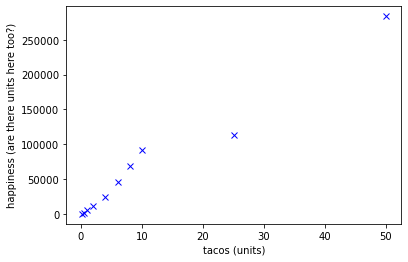

In [3]:
import matplotlib.pyplot as plt
plt.plot(standards_conc, Cu_standard_x, 'bx')

# Add reasonable labels on the x and y axis, always including units.
plt.xlabel("tacos (units)")
plt.ylabel("happiness (are there units here too?)")

## Adding error bars to our plot

We might consider using the standard deviation as a way to communicate some uncertainty in each of these values. We can do that by adding error bars to the plot!

Standard deviation is a very blunt instrument for expressing error in this case, but it is better than nothing. Let's try that first.
Notice we've switched to a different type of plt plot, and so we've needed to add some additional descriptors to keep track of what each of our inputs are doing.
The format is still plot.errorbar(x,y) but then we need to explicity give values for yerror bars (yerr), xerror bars (xerr, here none, since we don't have values there) and then we use fmt as format, to inidcate the color and shape of the markers). We could omit these descriptors and the code would still work, but leaving them in helps us keep track of what is happening as the functions get more complex!


Text(0, 0.5, 'average intensity')

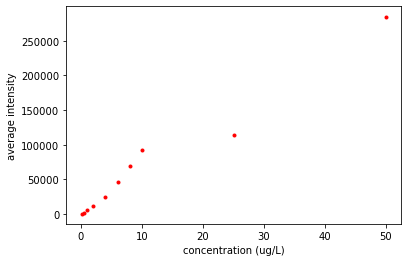

In [4]:
plt.errorbar(standards_conc, Cu_standard_x, yerr = Cu_standards_s, xerr = None, fmt = 'r.')
plt.xlabel("concentration (ug/L)")
plt.ylabel("average intensity")

We can't actually see much here; the standard deviations are very small. It is best to use the confidence interval for error bars instead! Remember, we just need to multiple our standard deviation by a Student's t constant, and divide by the square root of n. Here, the code is written to show error bars at the 95 % confidence interval. Change the confidence level until you can actually see the error bars!

Text(0, 0.5, 'average intensity')

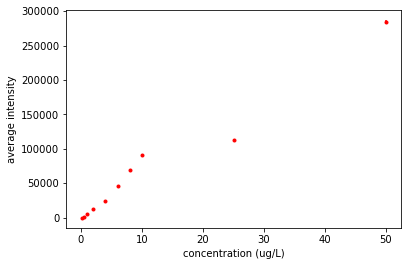

In [5]:
# use c to set the confidence you want (90 % is 0.90, for example)
c = 0.90
alpha = 1-c

#how many replicates did we run?
n = 3

t = stats.t.ppf(1-alpha/2, n-1)

CI = np.array(Cu_standards_s)*(t/math.sqrt(n))

plt.errorbar(standards_conc, Cu_standard_x, yerr = CI, xerr = None, fmt = 'r.')
plt.xlabel("concentration (ug/L)")
plt.ylabel("average intensity")

#change the confidence level until you can actual see error bars!

## External Calibration Curve
### Linear Regression Model and Predicting the Equation of the Line

This type of plot is called an <b> external calibration curve </b> in analytical chemistry, because we can take some other (external) data point, for which we have, say, a density measurement, and use this plot to determine that unknown sample's concentration. You have seen this before in general chemistry (for example, you may have plotted absorbance vs. concentration Ni in 152L)


To get the most out of an external calibration curve, it's helpful to have the equation of the line, in <i> y = mx + b </i> format. That allows you to quickly and easily do the math to determine any <i> x </i> (here, concentration in mole/liter) for any measured <i> y </i> (here, density). You may know how to do this in Excel, or on your graphing calculator. Let's take a look at how it works in Python!

In [7]:
# the linear regression function in the scipy stats module returns 5 values: slope, intercept, R-squared and then two uncertainty values p and s_m
# we'll ignore the last two for the moment, since all we really need right now is the equation of the line
# you may want to update this to keep track of which element we're talking about here!
m, b, R2, p, s_m = stats.linregress(standards_conc, Cu_standard_x)

print (F'the equation of the line is y = {m}x + {b} and its R-squared value is {R2}')


the equation of the line is y = 5430.310604171041x + 6783.394959536716 and its R-squared value is 0.9817111665055329


### Adding the 'best fit line' to your graph

It's always a nice reality check to see the line plotted along with your data. In this case, we can think about this line as a model to help us make a prediction about our data. So we can plug in a range of concentration values, and we so we can plot the y values that our y = mx + b model predicts, and see how well it matches the real data.

Text(0, 0.5, 'intensity')

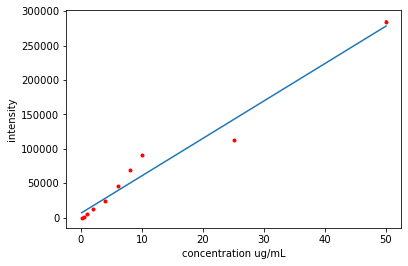

In [11]:

# we do need to convert standards to a numpy array in order to make sure we can multiple through for each value
x = np.array(standards_conc)

# Use our predicted model
predict_y = (x*m)+b
# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(x,predict_y)

#add the real data to the plot, just like we did before:
plt.errorbar(standards_conc, Cu_standard_x, yerr = CI, xerr = None, fmt = 'r.')
plt.xlabel("concentration ug/mL")
plt.ylabel("intensity")

## Solve for your unknown

Using the equation above, calculate the first unknown concentration by hand . Then complete the code below to calculate the unknown concentration. Make sure your hand-written calculation and your python code are producing the same result!

In [12]:
# convert lists to numpy arrays so we can do math on each element individually
unknown_av = np.array(Cu_unknown_x)

unknown_std = np.array(Cu_unknown_s)

# now using m, b and unknown_density, solve for unknown_concentration
unknown_concentration = (unknown_av-b)/m

print (F'the concentration of the unknowns are {unknown_concentration} ug/mL')

#do your values match? If not, check your math!


the concentration of the unknowns are [99.89186523 -0.15646526 -1.07103725  1.87040775  1.51436182 -0.30597052] ug/mL


## Uncertainty in a linear regression

We have an $R^{2}$ value which gives us an idea how well our predicted line is able to fit our real data, but it's hard to turn that value into a real uncertainty value on our unknown calcultion. Ideally, we'd like an uncertainty in the same units are our final answer here (so in this case, in ug/L). In order to do that, we need to think about what error actually means in a linear regression.

You read a lot of detail about how the matrix math works to produce that linear regression, and along with it, error values in the slope and intercept values produced. For whatever reason, most of the python linear regression packages just return the error in the slope. This is useful if you're main goal is to use a linear regression to determine a relationship between your variables, but in our case, we really need the error in the y values being predicted. That is the value we can transform into an x value error!

Think about what error on the y-value means. You're making a prediction, so our questions is how close is that prediction to the real value?

First, we'll think about the deviation of each measured y value ($y_{i}$) from the predicted y value (where $ y= mx+b $):

$$ d_{i} = y_{i} - (m x_{i} + b) $$

Then we want to compile those deviations for every point we have available, to turn them into an overall assessment of the standard deviation of the y values:

$$ s_{y}={\sqrt {\frac {\sum (d_{i})^{2}}{n-2}}} $$

In [13]:
# Manually calculate error in y 
# standard error in most python packages is the error in the slope, rather than error in the y-predicitions of the model
#organize our x and y data here, starting with Cu
x = np.array(standards_conc)
y = np.array(Cu_standard_x)

sum_square = 0

n = len(x)

## so here, for every single point in our array, we're plugging in concentration, and comparing it to the actual measured absorbance
# Again, note that our count variable does double duty; keeping track of the while loop, and calling the right array value! 

for i in range(n):
  sum_square = sum_square + ((y[i]-(m*x[i])-b)**2)
    
    
y_err = math.sqrt(sum_square/(n-2))
print (F"the y error predicted by this linear regression model is {y_err} arbirtrary absorbance units")


the y error predicted by this linear regression model is 17502.328548872647 arbirtrary absorbance units


### Standard error in the intercept

Since the linear regression command in the stats module gives us the uncertainty in the slope, and we just calculated the uncertainty in the y values, we can take a shortcut to the uncertainty in the intercept, which avoids having to actually do any matrix math here. Note that

$$ u_{m}^{2} = \frac{s_{y}^{2}n}{D} $$

Can be rewritten as $$ D = \frac{s_{y}^{2}n}{u_{m}^{2}} $$

So that we can write $ u_{b}^{2} $ in terms of values we have already calculated!
$$ u_{b}^{2} = \frac{s_{y}^{2}\sum{x_{i}^{2}}}{D} = \frac{\sum{x_{i}^{2}}u_{m}^{2}}{n} $$

Once you have all of these uncertainty values, be sure to print out equation of the line, with full uncertainty and correct sig figs!

In [14]:
s_b = math.sqrt((sum(x**2)*(s_m**2))/(len(x)))

print(F'error in the slope is {s_m}')
print(F"error in the intercept is {s_b}")

#print the full equation of the line, with correct sig figs here (i.e y +/- yerror = etc. etc.)

error in the slope is 372.31379500917075
error in the intercept is 6810.656377065502


### Convert a y value into an uncertainty on our calculated x value

Now we have all of the information we need to propogate error through the calibration curve. The equation needed is shown below:

$$ s_{x}= \frac{s_{y}}{\mid{m}\mid}{\sqrt {\frac {1}{k} + \frac {1}{n} + \frac {(y-\bar{y})^{2}}{m^{2}\sum (x-\bar{x})^{2}}}} $$

You now have all of these variables:  m is the slope, k is the number of replicate measurements in your unknown, n is the number of points in your calibration curve, and x is all of your calibration curve x values, either individually ($ x_{i} $) or the average of those values $ (\bar{x} ) $ 

$\bar{y}$ is the average of all of the y values in your calibration curve, and y is the unknown you measured. Note that this means that the closer your measured unknown is to the center of your calibration curve, the smaller that value will be!

Now we have to set up some math to make this happen. I'd strongly suggest breaking it down into components!

In [ ]:
# first, s_y/m

var1 = y_err/m

# then, lets get all of the pieces inside the square root

# here we're using the length command to just check how long our unknown array was, and how long our calibration curve x value array was
inv_k = 3 # here we're just manual entering the # of replicates
inv_n = 1/len(x)

# now let's get the two averages
y_bar = np.mean(y)
x_bar = np.mean(x)

# We'll need a loop to handle the sum

# ss is where we'll save the sum of squares

ss = 0

# you'll need a for loop to compute the sum, like you've seen before
# Can you complete the for loop? 
for x in range(len(x)):
    ss = 
    


# now calculate the whole last component

var4 = ((unknown_av-y_bar)**2)/((m**2)*ss)



s_x =  var1*math.sqrt(inv_k+inv_n+var4)

# always report uncertainy values with their accompanying measured values
print (F'the concentration of the unknown is ' + str(unknown_concentration) + ' ug/mL +/- ' + str(s_x) + 'ug/mL')

#report a relative error instead of absolute

s_x_rel = (s_x/unknown_concentration) * 100

print ('the concentration of the unknown is ' + str(unknown_concentration) + ' ug/mL +/- ' + str(s_x_rel) + '%')

## Limit of Detection and Limit of Quantitation

We can use data from any external calibration curve to estimate a LOD and LOQ for our technique. In this case, the signal LOD is the intensity given by $$ b+3 * y_{error} $$
Plugging into y = mx+ b to get an LOD in concentration units gives: $$ x_{LOD} = \frac{3*y_{error}}{m} $$

LOQ is the same idea, but with a higher threshold of error (so that quantitative data is reported with error less than 10%!)
$$ x_{LOQ} = \frac{10*y_{error}}{m} $$

In [15]:
# all of the variables needed here are already defined!
# Calculate LOD for each element:


# Calculate LOQ for each element:



# Print the values out nicely with descriptions!

## Postlab Questions
1. What were your final concentrations with error? How do these values compare to your EDTA resutls?
2. Estimate limits of detection and quantitation for these techniques. Explain what those values mean. How do these values compare to your calculated unknowns?
3. Write a brief conclusion - what were our goals and did we meet them?